<a href="https://colab.research.google.com/github/kiron-ang/introduction/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the data from the research paper
!curl -O ftp.ncbi.nlm.nih.gov/geo/series/GSE273nnn/GSE273615/suppl/GSE273615_RAW.tar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3612M  100 3612M    0     0  12.0M      0  0:05:01  0:05:01 --:--:-- 8212k


In [2]:
# Extract the data from the TAR archive
!tar -xvf GSE273615_RAW.tar

GSM8433816_M18.tar.gz
GSM8433817_M21.tar.gz
GSM8433820_Sample4_GEX.zip
GSM8433820_Sample4_VDJ.zip
GSM8433821_Sample6_GEX.zip
GSM8433821_Sample6_VDJ.zip
GSM8433822_Sample7_GEX.zip
GSM8433822_Sample7_VDJ.zip
GSM8433823_Sample9_GEX.zip
GSM8433823_Sample9_VDJ.zip
GSM8433828_Liver3_VDJ.zip
GSM8433829_Liver3-1_GEX.zip
GSM8433829_Liver3-1_VDJ.zip
GSM8433830_Tumor3_GEX.zip
GSM8433830_Tumor3_VDJ.zip
GSM8433831_Tumor3-1_GEX.zip
GSM8433831_Tumor3-1_VDJ.zip
GSM8433832_Liver10_GEX.zip
GSM8433832_Liver10_VDJ.zip
GSM8433833_Liver10-1_GEX.zip
GSM8433833_Liver10-1_VDJ.zip
GSM8433834_Tumor10_GEX.zip
GSM8433834_Tumor10_VDJ.zip
GSM8433835_Tumor10-1_GEX.zip
GSM8433835_Tumor10-1_VDJ.zip
GSM8433836_Liver11-1_GEX.zip
GSM8433836_Liver11-1_VDJ.zip
GSM8433837_Tumor11_GEX.zip
GSM8433837_Tumor11_VDJ.zip
GSM8433838_Liver9_GEX.zip
GSM8433838_Liver9_VDJ.zip
GSM8433839_Liver9-1_GEX.zip
GSM8433839_Liver9-1_VDJ.zip
GSM8433840_Tumor34_GEX.zip
GSM8433840_Tumor34_VDJ.zip
GSM8433841_Tumor29_GEX.zip
GSM8433841_Tumor29_VDJ.zi

In [4]:
# Extract the data from GSM8433820_Sample4_GEX.zip
!unzip GSM8433820_Sample4_GEX.zip

Archive:  GSM8433820_Sample4_GEX.zip
  inflating: barcodes.tsv.gz         
  inflating: __MACOSX/._barcodes.tsv.gz  
  inflating: features.tsv.gz         
  inflating: __MACOSX/._features.tsv.gz  
  inflating: matrix.mtx.gz           
  inflating: __MACOSX/._matrix.mtx.gz  


In [5]:
# Install scanpy (scanpy.readthedocs.io)
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
# Read the data with scanpy
import scanpy
data = scanpy.read_10x_mtx(".")
data

AnnData object with n_obs × n_vars = 13975 × 32285
    var: 'gene_ids', 'feature_types'

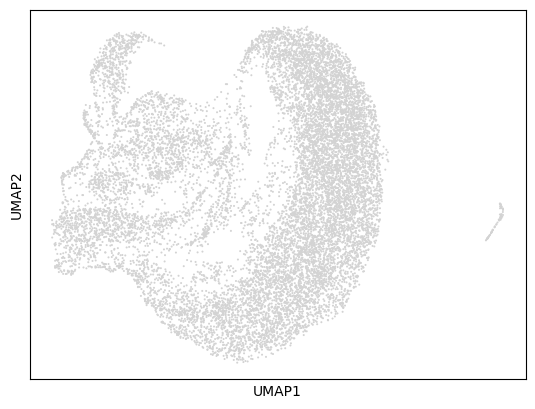

In [7]:
# Visualize the data with a UMAP
scanpy.pp.pca(data)
scanpy.pp.neighbors(data)
scanpy.tl.umap(data)
scanpy.pl.umap(data)